In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
# remover o exemplo.zip caso já exista
!rm -rf IMAGES_SPLIT.zip

# remover o diretório gerado ao descompactar o exemplo.zip caso já exista
!rm -rf IMAGES_SPLIT/

# baixar o arquivo do GoogleDrive usando o gdown
!gdown https://drive.google.com/uc?id=1z287fjVKt6qYmxaW5COEbrlVARywPGpr



Downloading...
From: https://drive.google.com/uc?id=1z287fjVKt6qYmxaW5COEbrlVARywPGpr
To: /content/IMAGES_SPLIT.zip
100% 11.9M/11.9M [00:00<00:00, 165MB/s]


In [10]:
# descompactar o arquivo exemplo.zip
!unzip IMAGES_SPLIT.zip

# listar os arquivos e diretórios
# !ls -ltr

Archive:  IMAGES_SPLIT.zip
   creating: IMAGES_SPLIT/test/
   creating: IMAGES_SPLIT/test/OVELHA/
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-Hlwhn-q8CYGCVNd1mDVrwAHaFj.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-I_gTJkUDfqSn6S2kevC-5QHaFj.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-IQSogORKZuCCsfcDyJKc8AHaFj.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-iTBCIb1WFqUm7l2yOgQnRAHaHa.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-IXHLR_NagDEQHpN4c3jLvQAAAA.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-j5H5QbcwjO8VC40pZFMMxwHaE8.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-Jiaddpm3t_gHe1MidPPm5wHaGw.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-JLewNpN2HxDeKLp2L4BjaQHaEj.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-Jq3Bl9itYVLAXnkbCSA_wwHaE8.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-jsssupxq02OkUxP7LNWM7gHaII.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-jw3IlseqiAzpXgUtOM6wpAHaFj.jpeg  
  inflating: IMAGES_SPLIT/test/OVELHA/OIP-jW9uZm9cox2kzddQLCN9NAHa

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# definindo o tamanho (tam x tam) que usaremos para as imagens na CNN, o componente já fará o redimensionamento delas.
tam = 128

# Instanciando um objeto para ler os exemplos de treinamento. Para os exemplos de treinamento, serão feitas algumas operações com as imagens.
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = False,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

# Usando o objeto gerador_treinamento criado, faremos a carga de todas as imagens do diretório de treinamento. Os subdiretórios indicarão a que classe dada imagem pertence.
base_treinamento = gerador_treinamento.flow_from_directory('IMAGES_SPLIT/train',
                                                           target_size = (tam,tam),                                                           
                                                           batch_size=500, 
                                                           class_mode = 'binary')


# Instanciando um objeto para ler os exemplos de validação e teste. Neste caso faremos apenas a normalização dos valores pois queremos que a rede reconheça as imagens sem pré-processá-las.
gerador_teste = ImageDataGenerator(rescale = 1./255)

# Fazendo a carga das imagens de validação
base_validacao = gerador_teste.flow_from_directory('IMAGES_SPLIT/validation',
                                                           target_size = (tam,tam),  
                                                            batch_size=500,                                                          
                                                           class_mode = 'binary')
# Fazendo a carga das imagens de teste
base_teste = gerador_teste.flow_from_directory('IMAGES_SPLIT/test',
                                                           target_size = (tam,tam),  
                                                            batch_size=500,                                                         
                                                           class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 0.6933 - accuracy: 0.4450 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.6939 - accuracy: 0.4950 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.6931 - accuracy: 0.4900 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/100
1/1 [===============

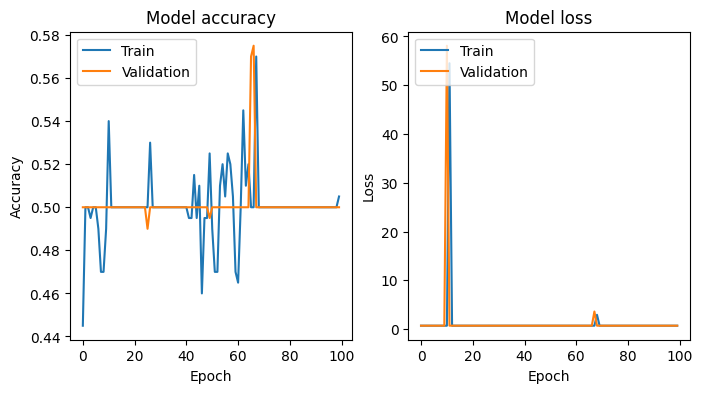

In [13]:
#@title
# Definir modelo de rede neural convolucional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Nadam

# VGG16 model structure
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(tam, tam, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# FC layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Nadam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(base_treinamento, epochs=100, batch_size=16, validation_data=base_validacao, steps_per_epoch=len(base_treinamento), validation_steps=len(base_validacao))

# Fazer previsões no conjunto de teste
y_pred = model.predict(base_teste)
y_pred = (y_pred > 0.5).astype(int)

# Calcular métricas de desempenho
y_test = base_teste.classes
cm = confusion_matrix(y_test, y_pred.flatten())
acc = accuracy_score(y_test, y_pred.flatten())


# Imprimir métricas de desempenho
print("Acurácia: {:.2f}%".format(acc * 100))
print("Matriz de confusão:")
print(cm)

# Salvar modelo treinado
model.save("modelo_EX2.h5")

# Plot accuracy and loss graphs
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [14]:
import os
import math
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the trained model
#model = load_model("modelo_EX2_New.h5")

# Set the test images directory
test_images_dir = "IMAGES_SPLIT/test"

# Create ImageDataGenerator for test set
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create test set generator
test_generator = test_datagen.flow_from_directory(
    test_images_dir,
    target_size=(tam, tam),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Define class labels
class_labels = {0: 'Ovelha', 1: 'Vaca'}

# Calculate the number of rows and columns for the subplot grid
num_images = len(test_generator)
num_cols = 4
num_rows = math.ceil(num_images / num_cols)

# Set the figure size and create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
fig.tight_layout()

# Iterate over the test images and make predictions
for i in range(num_images):
    # Load the image and preprocess it
    img_path = test_generator.filepaths[i]
    img = image.load_img(img_path, target_size=(tam, tam))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    
    # Make a prediction on the image
    prediction = model.predict(img_array_expanded_dims)
    predicted_class = (prediction > 0.5).astype(int)
    predicted_class_label = class_labels[predicted_class[0][0]]
    
    # Show the image and the predicted class label in the subplot
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Predicted class: {predicted_class_label}")
    axes[row, col].axis("off")

# Remove unused subplots
for i in range(num_images, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Display the subplots
plt.show()


Output hidden; open in https://colab.research.google.com to view.